# Insurance premium prediction

In [38]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df=pd.read_csv('insurance.csv')

In [40]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


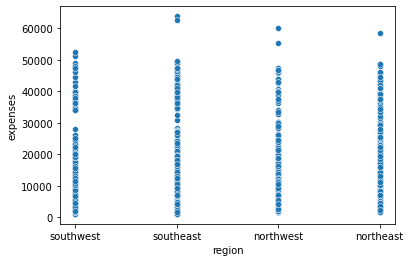

In [45]:
ax=sns.scatterplot(x='region',y='expenses',data=df)
plt.show(ax)

In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [10]:
x=df.drop(['expenses'],axis=1)

In [11]:
x.head(1)

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest


In [12]:
y=df['expenses']

In [13]:
y.head(1)

0    16884.92
Name: expenses, dtype: float64

In [14]:
city=pd.get_dummies(x['region'])

In [15]:
city.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [16]:
gender=pd.get_dummies(x['sex'])

In [17]:
gender.head()

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [18]:
s=pd.get_dummies(x['smoker'])

In [19]:
s.head()

,no,yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [20]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest


In [21]:
df1=x[['age','bmi','children']]

In [22]:
df1.head()

,age,bmi,children
0,19,27.9,0
1,18,33.8,1
2,28,33.0,3
3,33,22.7,0
4,32,28.9,0


In [23]:
df2=pd.concat([df1,gender,s,city],axis=1)

In [24]:
df2.head()

,age,bmi,children,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,27.9,0,1,0,0,1,0,0,0,1
1,18,33.8,1,0,1,1,0,0,0,1,0
2,28,33.0,3,0,1,1,0,0,0,1,0
3,33,22.7,0,0,1,1,0,0,1,0,0
4,32,28.9,0,0,1,1,0,0,1,0,0


In [25]:
x1=df2

In [26]:
x1.head()

,age,bmi,children,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,27.9,0,1,0,0,1,0,0,0,1
1,18,33.8,1,0,1,1,0,0,0,1,0
2,28,33.0,3,0,1,1,0,0,0,1,0
3,33,22.7,0,0,1,1,0,0,1,0,0
4,32,28.9,0,0,1,1,0,0,1,0,0


In [27]:
x2=x1.rename(columns={'no':'smoke_no','yes':'smoke_yes'})

In [28]:
x2.head(2)

,age,bmi,children,female,male,smoke_no,smoke_yes,northeast,northwest,southeast,southwest
0,19,27.9,0,1,0,0,1,0,0,0,1
1,18,33.8,1,0,1,1,0,0,0,1,0


In [29]:
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [30]:
w=pd.concat([x2,y],axis=1)

In [31]:
w.head()

,age,bmi,children,female,male,smoke_no,smoke_yes,northeast,northwest,southeast,southwest,expenses
0,19,27.9,0,1,0,0,1,0,0,0,1,16884.92
1,18,33.8,1,0,1,1,0,0,0,1,0,1725.55
2,28,33.0,3,0,1,1,0,0,0,1,0,4449.46
3,33,22.7,0,0,1,1,0,0,1,0,0,21984.47
4,32,28.9,0,0,1,1,0,0,1,0,0,3866.86


# Splitting test and train dataset

In [32]:
from sklearn.model_selection import train_test_split
x2_train,x2_test,y_train,y_test = train_test_split(x2,y,train_size=0.7,random_state=10)

# LinearRegression

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
reg=LinearRegression()

In [35]:
reg.fit(x2_train,y_train)

LinearRegression()

In [36]:
reg.score(x2_test,y_test)

0.7167216069153657

In [ ]:
a=input('enter age')
b=input('enter bmi')
c=input('enter children')
d=input('enter female')
e=input('enter male')
f=input('enter smoke_no')
g=input('enter smoke_yes')
h=input('enter northeast')
i=input('enter northwest')
j=input('enter southeast')
k=input('enter southwest')
l=reg.predict([[a,b,c,d,e,f,g,h,i,j,k]])
print('predicted premium',l)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "g:\Users\com\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\com\AppData\Local\Temp/ipykernel_1056/1845390405.py", line 1, in <module>
    a=input('enter age')
  File "g:\Users\com\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 1006, in raw_input
    return self._input_request(
  File "g:\Users\com\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 1051, in _input_request
    raise KeyboardInterrupt("Interrupted by user") from None
KeyboardInterrupt: Interrupted by user

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "g:\Users\com\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2064, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling o

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "g:\Users\com\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\com\AppData\Local\Temp/ipykernel_1056/1845390405.py", line 1, in <module>
    a=input('enter age')
  File "g:\Users\com\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 1006, in raw_input
    return self._input_request(
  File "g:\Users\com\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 1051, in _input_request
    raise KeyboardInterrupt("Interrupted by user") from None
KeyboardInterrupt: Interrupted by user

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "g:\Users\com\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2064, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling o